In [1]:
import numpy as np
import pandas as pd
from inc_shape import IncrementalDepth
from prog_shape import ProgressiveDepth
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [11]:
df = pd.read_csv("./sample_data.csv")
print(df.shape)
df.head()

(13, 960)


,C_0,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,...,C_950,C_951,C_952,C_953,C_954,C_955,C_956,C_957,C_958,C_959
0,17.85,18.17,18.48,17.53,17.53,18.17,18.17,17.21,18.17,17.85,...,25.17,24.41,25.17,25.55,25.55,24.98,24.98,25.92,25.92,24.60
1,17.85,18.17,18.48,17.53,17.85,18.17,18.17,17.53,18.17,18.17,...,25.17,24.41,25.17,25.55,25.55,24.98,24.98,25.92,25.92,24.60
2,17.85,18.17,18.80,17.53,17.85,18.48,18.17,17.53,18.17,18.17,...,25.17,24.41,25.17,25.55,25.55,24.98,24.98,25.92,25.92,24.60
3,17.85,18.17,18.80,17.53,17.85,18.17,18.17,17.21,18.17,18.17,...,24.98,24.41,24.98,25.36,25.55,24.79,24.79,25.74,25.74,24.41
4,16.89,17.21,17.53,16.58,16.89,17.21,16.89,16.26,17.21,16.89,...,25.17,24.41,25.17,25.55,25.55,24.79,24.98,25.74,25.74,24.60


<Figure size 2500x500 with 0 Axes>

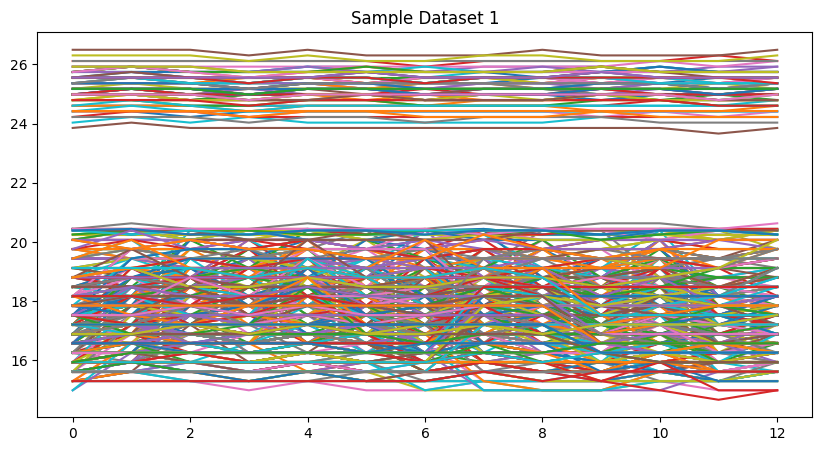

In [12]:
plt.figure(figsize=(25,5))
df.iloc[:,:-1].plot(legend=None, figsize=(10,5))
plt.title("Sample Dataset 1")
plt.show()

In [13]:
F = df.iloc[:,:-1].T.to_numpy()
prog_shape1 = ProgressiveDepth(F=F, p=0.9, k=1.5)
prog_shape1.getAmplitudeOutliers(F)
print(len(prog_shape1.labels))

959


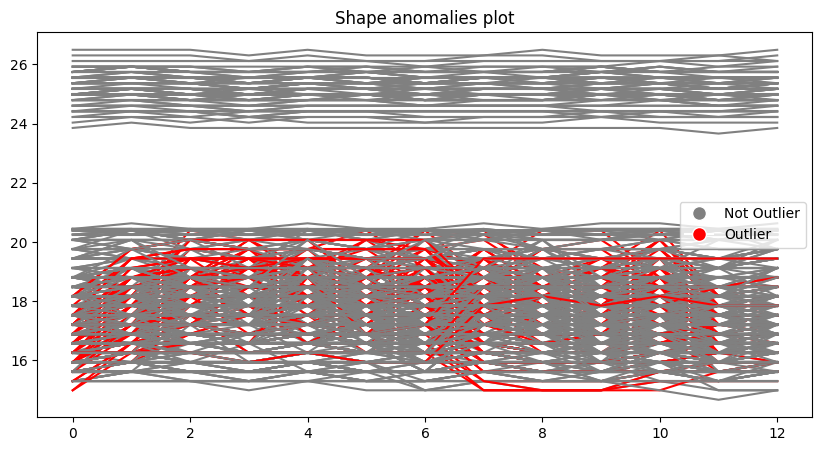

In [14]:
colors = {'not outlier': 'gray', 'outlier': 'red'}
cmap = ListedColormap([colors[label] for label in prog_shape1.labels])

legend_handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='Not Outlier', markerfacecolor='gray', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Outlier', markerfacecolor='red', markersize=10)
]
df.iloc[:, :-1].plot(colormap=cmap, figsize=(10, 5))
plt.title("Shape anomalies plot")
plt.legend(handles=legend_handles)

(13, 959)
number of labels: 959
0     24.60
1     24.60
2     24.60
3     24.41
4     24.60
5     24.60
6     24.41
7     24.60
8     24.41
9     24.60
10    24.60
11    24.41
12    24.41
Name: C_959, dtype: float64


Text(0.5, 1.0, 'New time series: C_959')

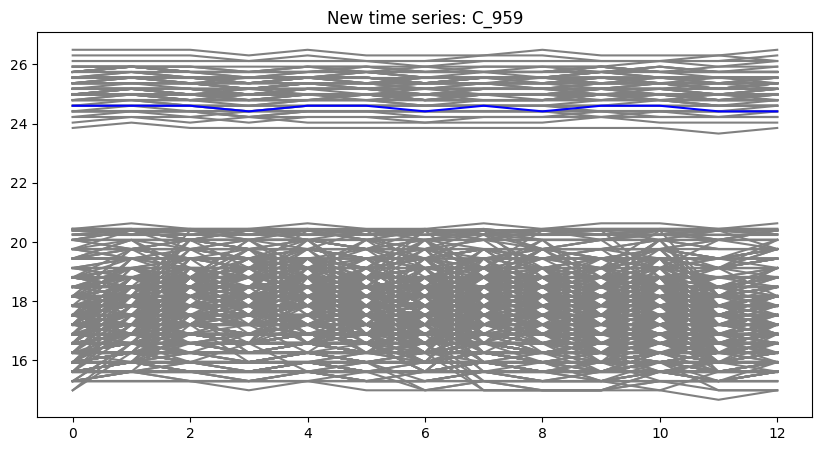

In [15]:
print(df.iloc[:,:-1].shape)
print('number of labels:',len(prog_shape1.labels))
print(df.iloc[:,959]) # new time series we are introducing
F_new = [df.iloc[:,959].T.to_numpy()] 
ax = df.iloc[:, :-1].plot(figsize=(10, 5), color='gray', legend=False)
df.iloc[:, 959].plot(ax=ax, color='blue')
plt.title("New time series: C_959")

In [16]:
prog_shape1.getAmplitudeOutliers(F_new)

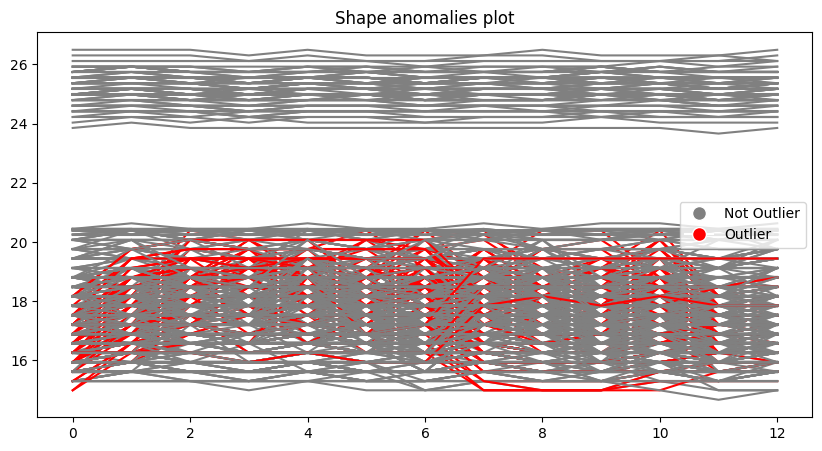

In [17]:
cmap = ListedColormap([colors[label] for label in prog_shape1.labels])
df.plot(colormap=cmap, figsize=(10, 5))
plt.title("Shape anomalies plot")
plt.legend(handles=legend_handles)

In [18]:
F = df.iloc[:-1,:].T.to_numpy() 
print(F.shape)
inc_shape1 = IncrementalDepth(F=F, p=0.9, k=1.5)
inc_shape1.getAmplitudeOutliers(F)

(960, 12)


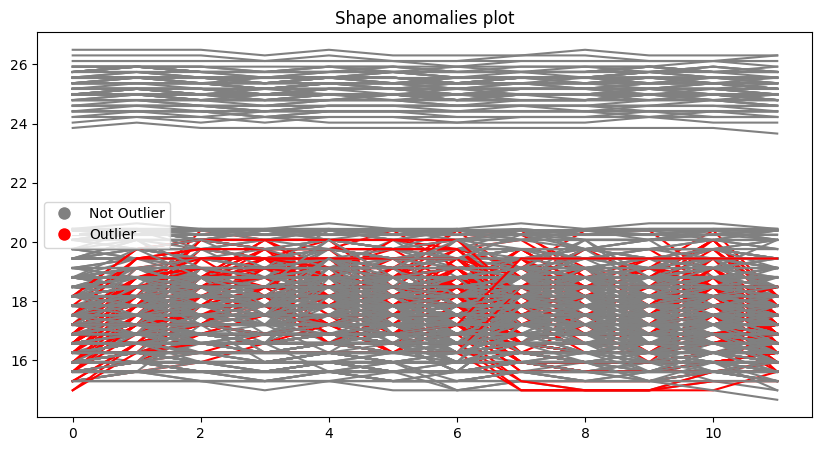

In [19]:
cmap = ListedColormap([colors[label] for label in inc_shape1.labels])
df.iloc[:-1,:].plot(colormap=cmap, figsize=(10, 5))
plt.title("Shape anomalies plot")
plt.legend(handles=legend_handles)

In [23]:
T_new = df.iloc[12,:].to_numpy().reshape(-1,1) # new time point we are introducing
print(T_new.shape)
print(inc_shape1.F.shape)
inc_shape1.update(T_new)
print(inc_shape1.F.shape)

[[16.89]
 [16.89]
 [17.53]
 [16.58]
 [16.58]
 [16.89]
 [16.58]
 [16.26]
 [17.21]
 [16.89]
 [17.85]
 [15.62]
 [17.21]
 [18.17]
 [17.85]
 [16.89]
 [16.89]
 [16.89]
 [17.53]
 [16.26]
 [17.21]
 [17.53]
 [17.53]
 [16.89]
 [17.21]
 [17.21]
 [17.53]
 [15.62]
 [17.53]
 [18.17]
 [18.17]
 [16.58]
 [16.26]
 [17.53]
 [17.21]
 [17.21]
 [18.17]
 [18.48]
 [18.17]
 [17.53]
 [16.26]
 [17.21]
 [17.21]
 [15.94]
 [15.94]
 [17.21]
 [16.89]
 [16.26]
 [16.89]
 [17.21]
 [18.17]
 [17.53]
 [15.94]
 [16.89]
 [16.89]
 [15.62]
 [16.58]
 [17.53]
 [17.85]
 [17.21]
 [16.58]
 [17.85]
 [17.53]
 [17.21]
 [16.58]
 [17.21]
 [18.17]
 [15.94]
 [16.89]
 [17.53]
 [17.53]
 [16.58]
 [16.89]
 [17.85]
 [17.53]
 [16.58]
 [15.94]
 [16.58]
 [16.26]
 [15.62]
 [17.53]
 [18.17]
 [18.48]
 [17.21]
 [15.94]
 [16.89]
 [16.58]
 [15.94]
 [16.58]
 [16.89]
 [17.85]
 [16.26]
 [16.58]
 [17.21]
 [18.17]
 [16.89]
 [17.85]
 [18.17]
 [18.17]
 [16.58]
 [17.53]
 [18.8 ]
 [17.53]
 [18.17]
 [16.89]
 [17.53]
 [17.85]
 [15.94]
 [16.89]
 [17.21]
 [17.85]
 

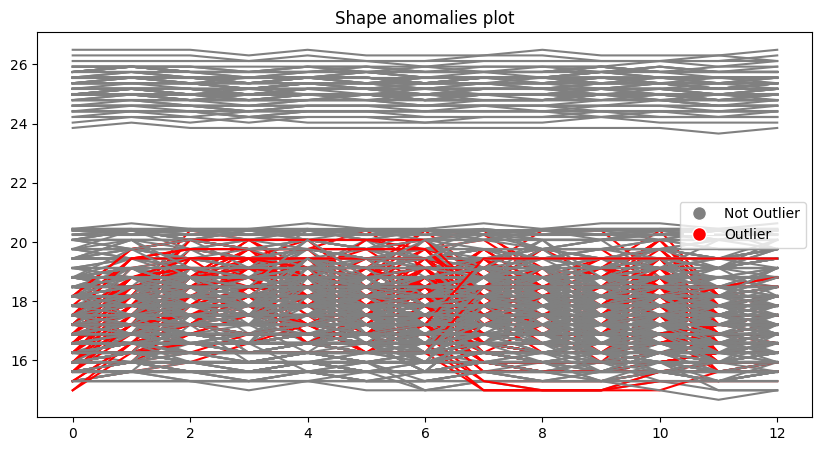

In [28]:
cmap = ListedColormap([colors[label] for label in inc_shape1.labels])
df.plot(colormap=cmap, figsize=(10, 5))
plt.title("Shape anomalies plot")
plt.legend(handles=legend_handles)